In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
churn_df = pd.read_csv("titanic.csv")
churn_df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
churn_df = churn_df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',   'Parch', 'Ticket','Fare', 'Cabin', 'Embarked']]
churn_df['Fare'] = churn_df['Fare'].astype('int')
churn_df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30,NaN,C


In [ ]:
X = np.asarray(churn_df[['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch']])
X[0:10]

array([[ 1,  0,  3,  1,  0],
       [ 2,  1,  1,  1,  0],
       [ 3,  1,  3,  0,  0],
       [ 4,  1,  1,  1,  0],
       [ 5,  0,  3,  0,  0],
       [ 6,  0,  3,  0,  0],
       [ 7,  0,  1,  0,  0],
       [ 8,  0,  3,  3,  1],
       [ 9,  1,  3,  0,  2],
       [10,  1,  2,  1,  0]])

In [ ]:
y = np.asarray(churn_df[['Fare']])
y[0:10]

array([[ 7],
       [71],
       [ 7],
       [53],
       [ 8],
       [ 8],
       [51],
       [21],
       [11],
       [30]])

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:10]

array([[-1.73, -0.79,  0.83,  0.43, -0.47],
       [-1.73,  1.27, -1.57,  0.43, -0.47],
       [-1.72,  1.27,  0.83, -0.47, -0.47],
       [-1.72,  1.27, -1.57,  0.43, -0.47],
       [-1.71, -0.79,  0.83, -0.47, -0.47],
       [-1.71, -0.79,  0.83, -0.47, -0.47],
       [-1.71, -0.79, -1.57, -0.47, -0.47],
       [-1.7 , -0.79,  0.83,  2.25,  0.77],
       [-1.7 ,  1.27,  0.83, -0.47,  2.01],
       [-1.7 ,  1.27, -0.37,  0.43, -0.47]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 5) (712, 1)
Test set: (179, 5) (179, 1)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
yhat = LR.predict(X_test)
yhat

array([ 7,  7,  7, 26, 31, 26,  7,  7, 26,  7,  7,  7,  7,  7, 26,  7,  7,
       69,  7, 26,  7,  7,  7,  7, 26,  7, 26, 26,  7,  7,  7,  7,  7,  7,
        7, 26,  7, 26,  7, 31,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7, 26,  7,  7,  7,  7,  7,  7, 26,  7,
        7,  7, 31, 69,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7, 26, 26,
       26,  7,  7, 26, 26, 26,  7,  7,  7,  7,  7,  7,  7, 26,  7, 26,  7,
        7,  7,  7, 26, 26,  7, 26, 26, 26,  7,  7, 26,  7,  7,  7,  7,  7,
        7,  7, 31, 31,  7, 26,  7,  7, 26,  7, 26,  7,  7,  7, 26,  7,  7,
        7,  7,  7,  7, 26, 26, 26, 26,  7,  7,  7,  7, 31, 69,  7, 26,  7,
       69,  7,  7,  7, 26,  7, 26,  7, 26,  7,  7, 26,  7, 26,  7, 26,  7,
        7,  7,  7, 26,  7,  7,  7, 26,  7])

In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       ...,
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01]])

In [ ]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.25139664804469275

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[0 0]
 [0 0]]


Confusion matrix, without normalization
[[0 0]
 [0 0]]


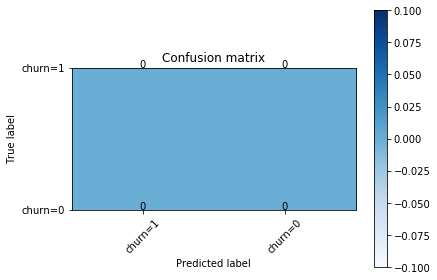

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [ ]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         2
           7       0.29      1.00      0.45        37
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00        14
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         6
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         3
          21       0.00      0.00      0.00         1
          22       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


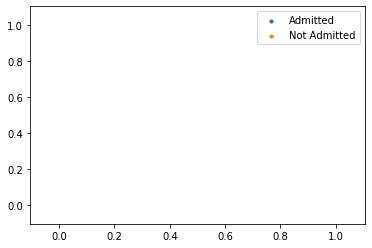

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def load_data(path, header):
    marks_df = pd.read_csv("titanic.csv", header=header)
    return marks_df


if __name__ == "__main__":
    # load the data from the file
    data = load_data("data/marks.txt", None)

    # X = feature values, all the columns except the last column
    X = data.iloc[:, :-1]

    # y = target values, last column of the data frame
    y = data.iloc[:, -1]

    # filter out the applicants that got admitted
    admitted = data.loc[y == 1]

    # filter out the applicants that din't get admission
    not_admitted = data.loc[y == 0]

    # plots
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
    plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
    plt.legend()
    plt.show()